In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()


In [2]:
train_df = pd.read_json("train.json.zip")
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [78]:
#No null values
#print("Missing values for Training data")
#print(train_df.isnull().sum())

print ("The number of missing data in building_id is", len(train_df[train_df['building_id'] == "0"]))
print ("The number of missing data in description is", len(train_df[train_df['description'].apply(len) == 0]))
print ("The number of missing data in display_address is", len(train_df[train_df['display_address'].apply(len) == 0]))
print ("The number of missing data in street_address is", len(train_df[train_df['street_address'].apply(len) == 0]))
print ("The number of missing data in features is", len(train_df[train_df['features'].apply(len) == 0]))
print ("The number of missing data in photos is", len(train_df[train_df['photos'].apply(len) == 0]))
print ("The number of missing data in latitude is", len(train_df[train_df['latitude'] == 0]))
print ("The number of missing data in longitude is", len(train_df[train_df['longitude'] == 0]))


The number of missing data in building_id is 8286
The number of missing data in description is 1446
The number of missing data in display_address is 135
The number of missing data in street_address is 10
The number of missing data in features is 3218
The number of missing data in photos is 3615
The number of missing data in latitude is 12
The number of missing data in longitude is 12


In [7]:
#Plotting graphs for price, longitude and latitude with 99th percentile

Text(0, 0.5, 'Frequency')

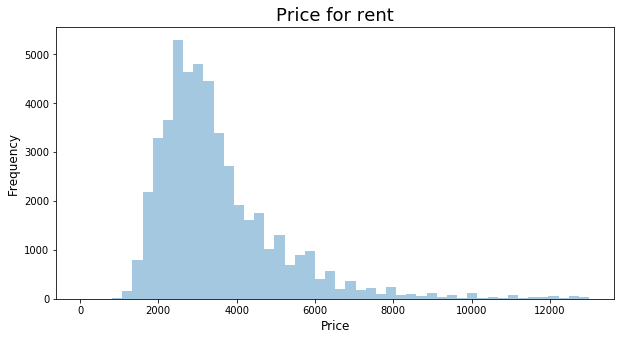

In [9]:
# Histogram for price
upper_lim = np.percentile(train_df.price.values, 99)
price_data = train_df[train_df['price'] <= upper_lim]
plt.figure(figsize=(10,5))
sns.distplot(price_data['price'], kde=False)
plt.title('Price for rent', fontsize=18)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

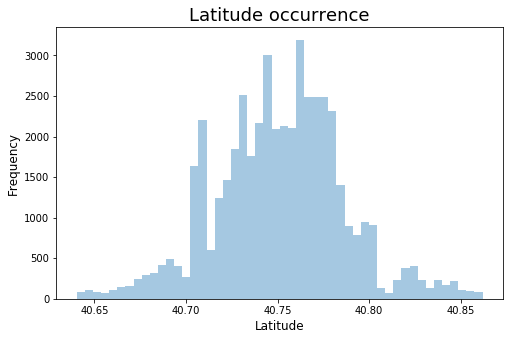

In [10]:
# Latitude Data 
lower_limit = np.percentile(train_df.latitude.values, 1) # Lower Limit = 40.6404, 491 values eliminated
upper_limit = np.percentile(train_df.latitude.values, 99) # Upper Limit = 40.8620, 494 values eliminated
long_data = train_df[(train_df['latitude'] <= upper_limit) & (train_df['latitude'] >= lower_limit)] 

# Histogram to show latitude
plt.figure(figsize=(8,5))
sns.distplot(long_data.latitude.values, bins=50, kde=False)
plt.title('Latitude occurrence', fontsize=18)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

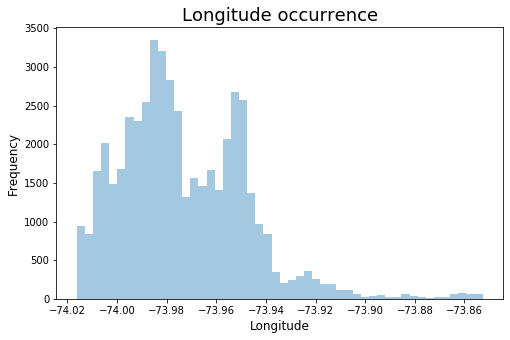

In [8]:
lower_limit = np.percentile(train_df.longitude.values, 1) # Lower Limit = -74.0162, 534 values eliminated
upper_limit = np.percentile(train_df.longitude.values, 99) # Upper Limit = -73.8526, 494 values eliminated
long_data = train_df[(train_df['longitude'] <= upper_limit) & (train_df['longitude'] >= lower_limit)] 

# Histogram to show longitude
plt.figure(figsize=(8,5))
sns.distplot(long_data.longitude.values, bins=50, kde=False)
plt.title('Longitude occurrence', fontsize=18)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


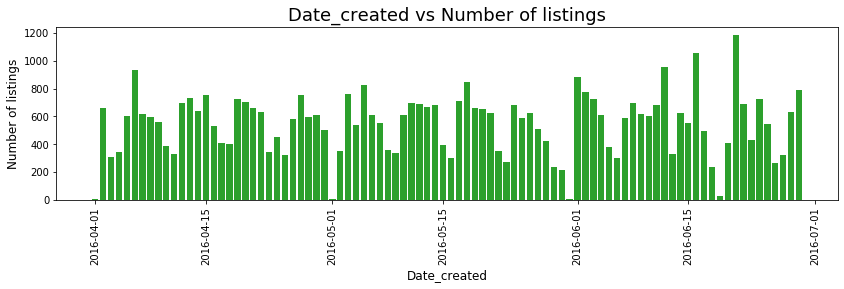

In [70]:
#detecting outliers in "created" => No outliers detected.
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["dateCreation"] = train_df["created"].dt.date
number_occurrences = train_df["dateCreation"].value_counts()
#print (number_occurrences)

plt.figure(figsize=(14,7))
axis = plt.subplot(211)
axis.bar(number_occurrences.index, number_occurrences.values, color=color[2])
axis.xaxis_date()
plt.xticks(rotation='vertical')
plt.title('Date_created vs Number of listings', fontsize=18)
plt.ylabel("Number of listings", fontsize=12)
plt.xlabel("Date_created", fontsize=12)
plt.show()


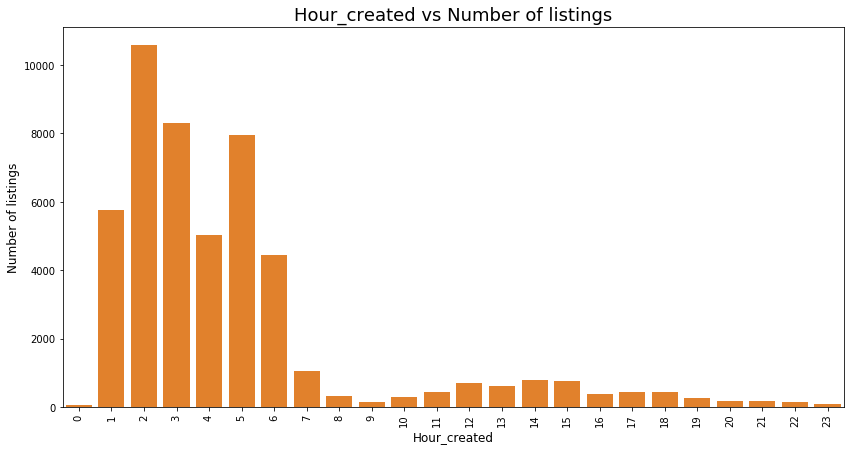

In [69]:
#checking for top 5 busiest hours
train_df["timeCreated"] = train_df["created"].dt.hour
number_occurrences = train_df["timeCreated"].value_counts()
#print (number_occurrences)
#The top 5 busiest hour is 2, 3, 5, 1, 4

plt.figure(figsize=(14,7))
sns.barplot(number_occurrences.index, number_occurrences.values, color=color[1])
plt.xticks(rotation='vertical')
plt.title('Hour_created vs Number of listings', fontsize=18)
plt.ylabel("Number of listings", fontsize=12)
plt.xlabel("Hour_created", fontsize=12)
plt.show()

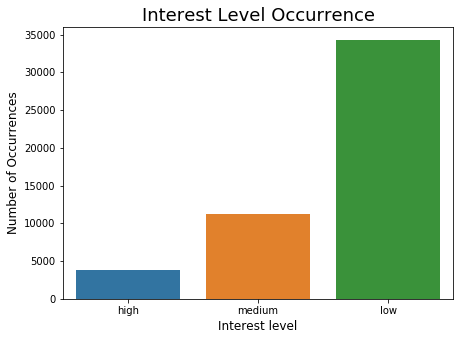

In [71]:
#Finding proportion of target variables
#Interest Levels
interest_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(interest_level.index, interest_level.values, order=['high', 'medium', 'low'])
plt.title('Interest Level Occurrence', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

In [16]:
#Finding outliers


In [17]:
def plot_values(col_name, xlabel, ylabel, color_no):
    num_col = train_df[col_name].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(num_col.index, num_col.values, color=color[color_no])
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize=12)

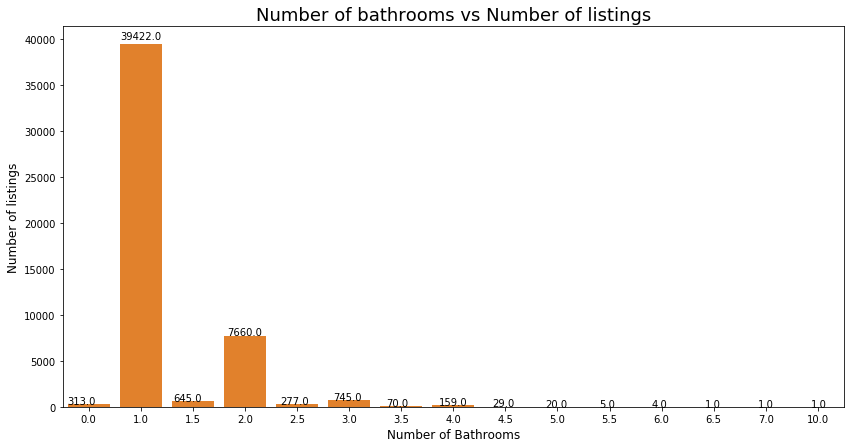

In [64]:
#bathrooms
#big jump from 7.o to 10.0: Listing with 10 bathrooms can be considered as outlier
#Number of outliers = 1
occurrences = train_df['bathrooms'].value_counts()
plt.figure(figsize=(14,7))
splot = sns.barplot(occurrences.index, occurrences.values, color=color[1])
plt.title('Number of bathrooms vs Number of listings', fontsize=18)
plt.ylabel("Number of listings", fontsize=12)
plt.xlabel("Number of Bathrooms", fontsize=12)

#for annotation
for p in splot.patches: 
    splot.annotate(str(p.get_height()), (p.get_x() * 1.020, p.get_height() * 1.015))

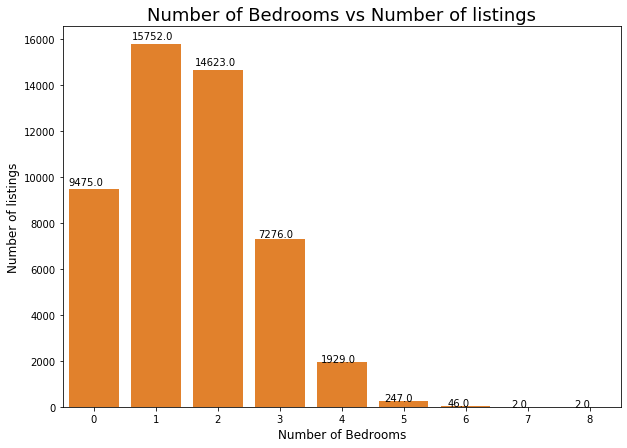

In [65]:
#bedrooms
#Small range and no big jump in the number of bedrooms
#No outliers
occurrences = train_df['bedrooms'].value_counts()

plt.figure(figsize=(10,7))
splot = sns.barplot(occurrences.index, occurrences.values, color=color[1])
plt.title('Number of Bedrooms vs Number of listings', fontsize=18)
plt.ylabel("Number of listings", fontsize=12)
plt.xlabel("Number of Bedrooms", fontsize=12)

#for annotation
for p in splot.patches: 
    splot.annotate(str(p.get_height()), (p.get_x() * 1.020, p.get_height() * 1.015))

Text(0.5, 0, 'longitude')

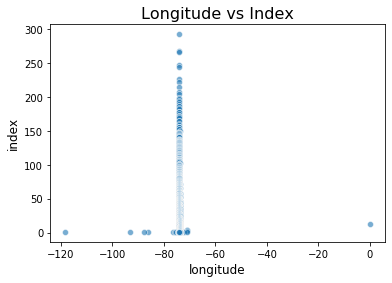

In [66]:
# Scatterplot to show outliers in longitude
num_col = train_df['longitude'].value_counts()
num = train_df[(train_df['longitude'] > -60) | (train_df['longitude'] < -80)]
#print ("The outliers which are outside of the range (-80, -60) are: \n", num['longitude'].value_counts())
#0 is a missing data, Number of outliers = 4
sns.scatterplot(num_col.index, num_col.values, alpha=0.6)
plt.title('Longitude vs Index', fontsize=16)
plt.ylabel('index', fontsize=12)
plt.xlabel('longitude', fontsize=12)

Text(0.5, 0, 'latitude')

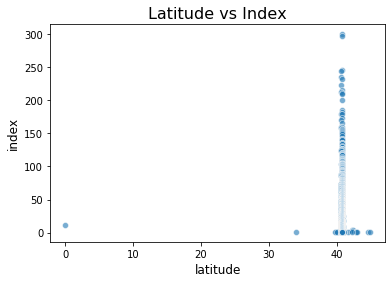

In [67]:
# Scatterplot to show outliers in latitude
num_col = train_df['latitude'].value_counts()
num = train_df[train_df['latitude'] < 38]
# print("The outliers are: \n" ,num['latitude'].value_counts())
#0 is a missing data, Number of outliers = 1
sns.scatterplot(num_col.index, num_col.values, alpha=0.6)
plt.title('Latitude vs Index', fontsize=16)
plt.ylabel('index', fontsize=12)
plt.xlabel('latitude', fontsize=12)

Text(0, 0.5, 'price')

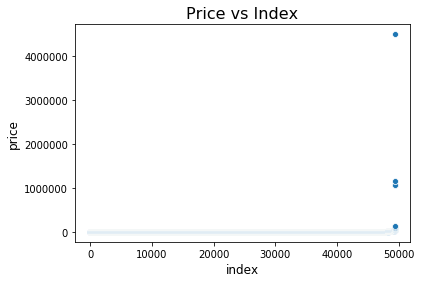

In [68]:
# Scatterplot for dectecting outliers for Price 
x = range(train_df.shape[0]) # One point for each row
y = np.sort(train_df['price']) # Price sorted in assending order
sns.scatterplot(x, y)
plt.title('Price vs Index', fontsize=16)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)

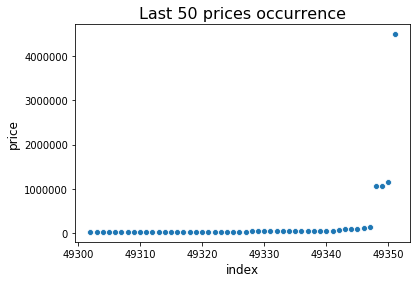

In [57]:
#In depth exploration of price outliers
#Number of outliers = 4
x = range(train_df.shape[0]) # One point for each row
y = np.sort(train_df['price']) # Price sorted in assending order
sns.scatterplot(x[-50:], y[-50:]) #plotting the last 50 prices
plt.title('Last 50 prices occurrence', fontsize=16)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)

outliers = train_df[train_df['price'] > 1000000]
# print(outliers['price'])
# print("Prices greater than $1000000:", y[-4:])

Text(0, 0.5, 'Number of managers')

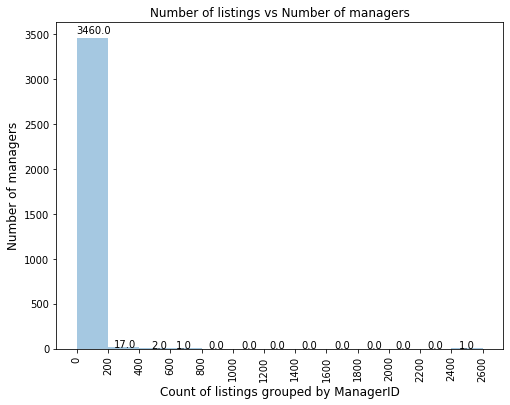

In [83]:
#detecting outliers in manager ID
new_df = train_df[['manager_id', 'listing_id']]
df = new_df.groupby('manager_id').count().sort_values(by='listing_id', ascending = False)
bin_values = np.arange(start=0, stop=2800, step=200)
splot = df['listing_id'].plot(kind = 'hist', bins=bin_values, figsize=[8,6], alpha = 0.4)
plt.xticks(bin_values, rotation = 'vertical')
for p in splot.patches: 
    if(p.get_x() < 600):
        splot.annotate(str(p.get_height()), (p.get_x() * 1.20, p.get_height() * 1.015))
    elif(p.get_x() < 1200):
        splot.annotate(str(p.get_height()), (p.get_x() * 1.055, p.get_height() * 1.015))
    elif(p.get_x() < 2000):
        splot.annotate(str(p.get_height()), (p.get_x() * 1.030, p.get_height() * 1.015))
    else:
        splot.annotate(str(p.get_height()), (p.get_x() * 1.020, p.get_height() * 1.015))
plt.title('Number of listings vs Number of managers')
plt.xlabel('Count of listings grouped by ManagerID', fontsize=12)
plt.ylabel('Number of managers', fontsize=12)